### P19: Veri Bilimi Tabanlı Kişilik Analizi
- Veri tabanındaki kişilerin kişilik özelliklerine karşılık gelen farklı sütunları içeren bir veri tabanından oluşur. Bu özelliklere atanan sayısal değerler kullanılarak, her birey farklı kişilik tipleri arasında sınıflandırılır ve bireyin o kişiliğe ne kadar karşılık geldiği de belirtilir.
- son iki sütun şu soruları yanıtlar;
> "Liste size özel mi?"
> "Filmleri izlemekten keyif aldınız mı?"

In [51]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

In [35]:
DATASETS_FOLDER = os.path.join("datasets")
os.listdir(DATASETS_FOLDER)

['.keep', '2018_ratings.csv', '2018-personality-data.csv', 'movies.csv']

In [36]:
ratings_df = pd.read_csv(f"{DATASETS_FOLDER}/2018_ratings.csv")
personality_data_df = pd.read_csv(f"{DATASETS_FOLDER}/2018-personality-data.csv")
movies_df = pd.read_csv(f"{DATASETS_FOLDER}/movies.csv", delimiter="::", header=None, names=['id', 'title', 'type'],
                        index_col=None)

### Veri Keşfi ve Ön işleme

Bu kısımda "personality_data_df" ile ilgili tüm veri keşif ve ön işleme aşamalarını göreceğiz.

In [37]:
personality_data_df.shape

(1834, 34)

In [38]:
personality_data_df.head(10)

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3
5,f91b2fb085d0feb47b86fc81b10207ee,6.0,3.0,4.0,3.5,1.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,4
6,f7b0502be8c86203ce6acaffe59f993a,4.5,4.0,6.0,5.0,4.0,diversity,low,1289,4.221673,...,1248,4.164153,1212,4.153351,2360,4.206983,5291,4.157934,3,4
7,36f31ef9879b4de96977aeba94878581,5.5,4.5,6.0,3.0,4.0,popularity,low,109243,4.300146,...,116897,4.101134,117444,4.138054,117192,4.164289,117533,4.231472,4,4
8,653bb2f69ddd19e1cf1f9e1871916d71,5.0,5.0,5.0,5.0,3.0,diversity,high,91658,5.021285,...,1035,4.710799,104241,4.587644,30749,4.870536,4886,4.622648,3,4
9,89d365a0d0f1a80ae8d079079a078155,6.0,6.5,2.0,2.5,3.0,diversity,high,91658,5.021285,...,1035,4.710799,104241,4.587644,30749,4.870536,4886,4.622648,3,2


In [45]:
rename_dict = {' openness': 'openness', ' agreeableness': 'agreeableness',
               ' emotional_stability': 'emotional_stability',
               ' conscientiousness': 'conscientiousness', ' extraversion': 'extraversion',
               ' assigned metric': 'assigned metric',
               ' assigned condition': 'assigned condition', ' is_personalized': 'is_personalized',
               ' enjoy_watching ': 'enjoy_watching'}
personality_data_df = personality_data_df.rename(columns=rename_dict)

In [46]:
personality_data_df.isnull().sum()

userid                  0
openness                0
agreeableness           0
emotional_stability     0
conscientiousness       0
extraversion            0
assigned metric         0
assigned condition      0
 movie_1                0
 predicted_rating_1     0
 movie_2                0
 predicted_rating_2     0
 movie_3                0
 predicted_rating_3     0
 movie_4                0
 predicted_rating_4     0
 movie_5                0
 predicted_rating_5     0
 movie_6                0
 predicted_rating_6     0
 movie_7                0
 predicted_rating_7     0
 movie_8                0
 predicted_rating_8     0
 movie_9                0
 predicted_rating_9     0
 movie_10               0
 predicted_rating_10    0
 movie_11               0
 predicted_rating_11    0
 movie_12               0
 predicted_rating_12    0
is_personalized         0
enjoy_watching          0
dtype: int64

In [47]:
personality_data_df.dtypes

userid                   object
openness                float64
agreeableness           float64
emotional_stability     float64
conscientiousness       float64
extraversion            float64
assigned metric          object
assigned condition       object
 movie_1                  int64
 predicted_rating_1     float64
 movie_2                  int64
 predicted_rating_2     float64
 movie_3                  int64
 predicted_rating_3     float64
 movie_4                  int64
 predicted_rating_4     float64
 movie_5                  int64
 predicted_rating_5     float64
 movie_6                  int64
 predicted_rating_6     float64
 movie_7                  int64
 predicted_rating_7     float64
 movie_8                  int64
 predicted_rating_8     float64
 movie_9                  int64
 predicted_rating_9     float64
 movie_10                 int64
 predicted_rating_10    float64
 movie_11                 int64
 predicted_rating_11    float64
 movie_12                 int64
 predict

In [48]:
personality_data_df.describe()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
count,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,...,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000
mean,5.376499,4.215921,4.561614,4.662486,3.485551,45669.233915,4.362927,50656.360414,4.322496,51791.061069,...,39458.009269,4.302993,38493.352236,4.301880,39280.998909,4.300609,38871.924755,4.302449,3.056707,3.517993
std,1.042804,1.137923,1.392548,1.311450,1.468503,46612.744107,0.383549,46669.152356,0.378746,46172.769718,...,44511.776921,0.380281,43444.149855,0.383848,43446.111523,0.378476,43486.579385,0.378439,1.078507,1.059060
min,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,2.510682,1.000000,2.423497,6.000000,...,1.000000,2.483215,1.000000,2.799538,1.000000,2.375510,1.000000,2.313341,1.000000,1.000000
25%,4.500000,3.500000,3.500000,4.000000,2.500000,2019.000000,4.110614,3307.750000,4.084125,3031.250000,...,1766.750000,4.049153,1302.000000,4.059146,1466.000000,4.052558,1256.000000,4.050181,2.000000,3.000000
50%,5.500000,4.000000,4.500000,4.500000,3.500000,17392.000000,4.355815,44377.000000,4.320721,48780.000000,...,7156.000000,4.307194,6964.000000,4.294702,7505.000000,4.299400,7361.000000,4.305078,3.000000,4.000000
75%,6.000000,5.000000,5.500000,5.500000,4.500000,94466.000000,4.618449,96606.000000,4.556173,95311.000000,...,84847.000000,4.545671,81847.000000,4.539686,81845.000000,4.549493,82069.000000,4.550886,4.000000,4.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,140737.000000,6.563889,136445.000000,6.585588,141761.000000,...,140359.000000,6.606617,134853.000000,7.345432,142115.000000,6.530355,139195.000000,6.574597,5.000000,5.000000


In [50]:
aux = preprocessing.LabelEncoder()
aux.fit(personality_data_df["assigned metric"])
personality_data_df["assigned metric"] = aux.transform(
    personality_data_df["assigned metric"]
)

aux = preprocessing.LabelEncoder()
aux.fit(personality_data_df["assigned condition"])
personality_data_df["assigned condition"] = aux.transform(
    personality_data_df["assigned condition"]
)

print(personality_data_df["assigned metric"])
print(personality_data_df["assigned condition"])

0       3
1       0
2       3
3       2
4       2
       ..
1829    2
1830    3
1831    3
1832    3
1833    2
Name: assigned metric, Length: 1834, dtype: int64
0       1
1       0
2       3
3       3
4       3
       ..
1829    2
1830    1
1831    2
1832    3
1833    1
Name: assigned condition, Length: 1834, dtype: int64


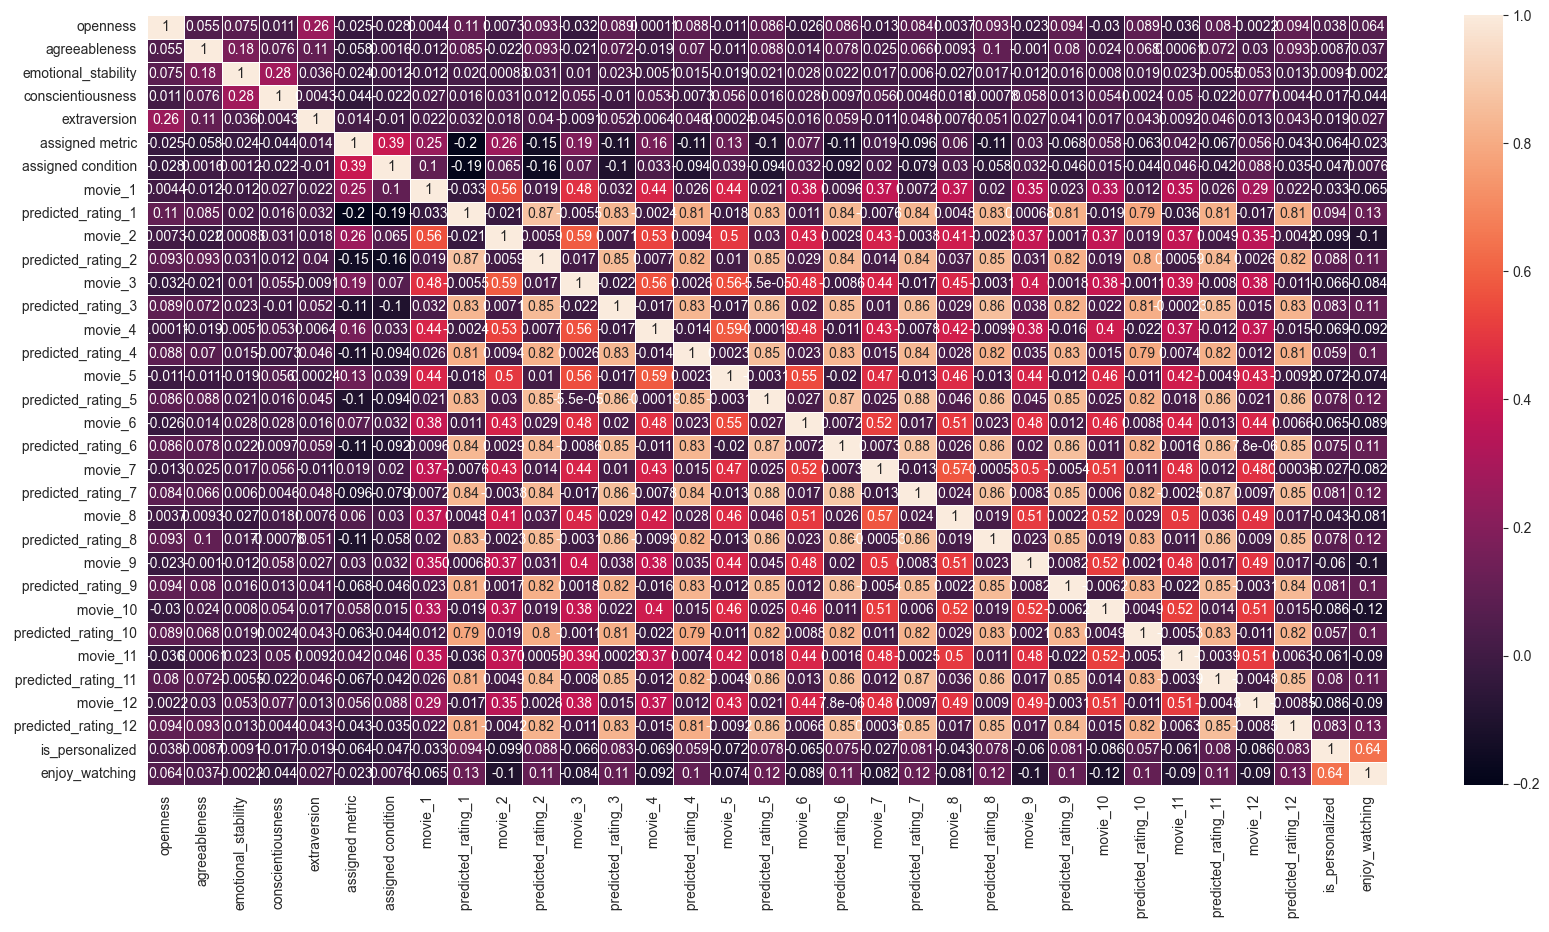

In [54]:
correlation = personality_data_df.corr()
plt.figure(figsize=(20, 10))
ax = sns.heatmap(correlation, annot=True, linewidths=.5)

In [55]:
personality_data_df_selected = personality_data_df.drop(
    [
        'openness', 'agreeableness', 'emotional_stability',
        'conscientiousness', 'extraversion', 'assigned metric',
        'assigned condition', 'is_personalized', 'enjoy_watching'
    ],
    axis=1
)

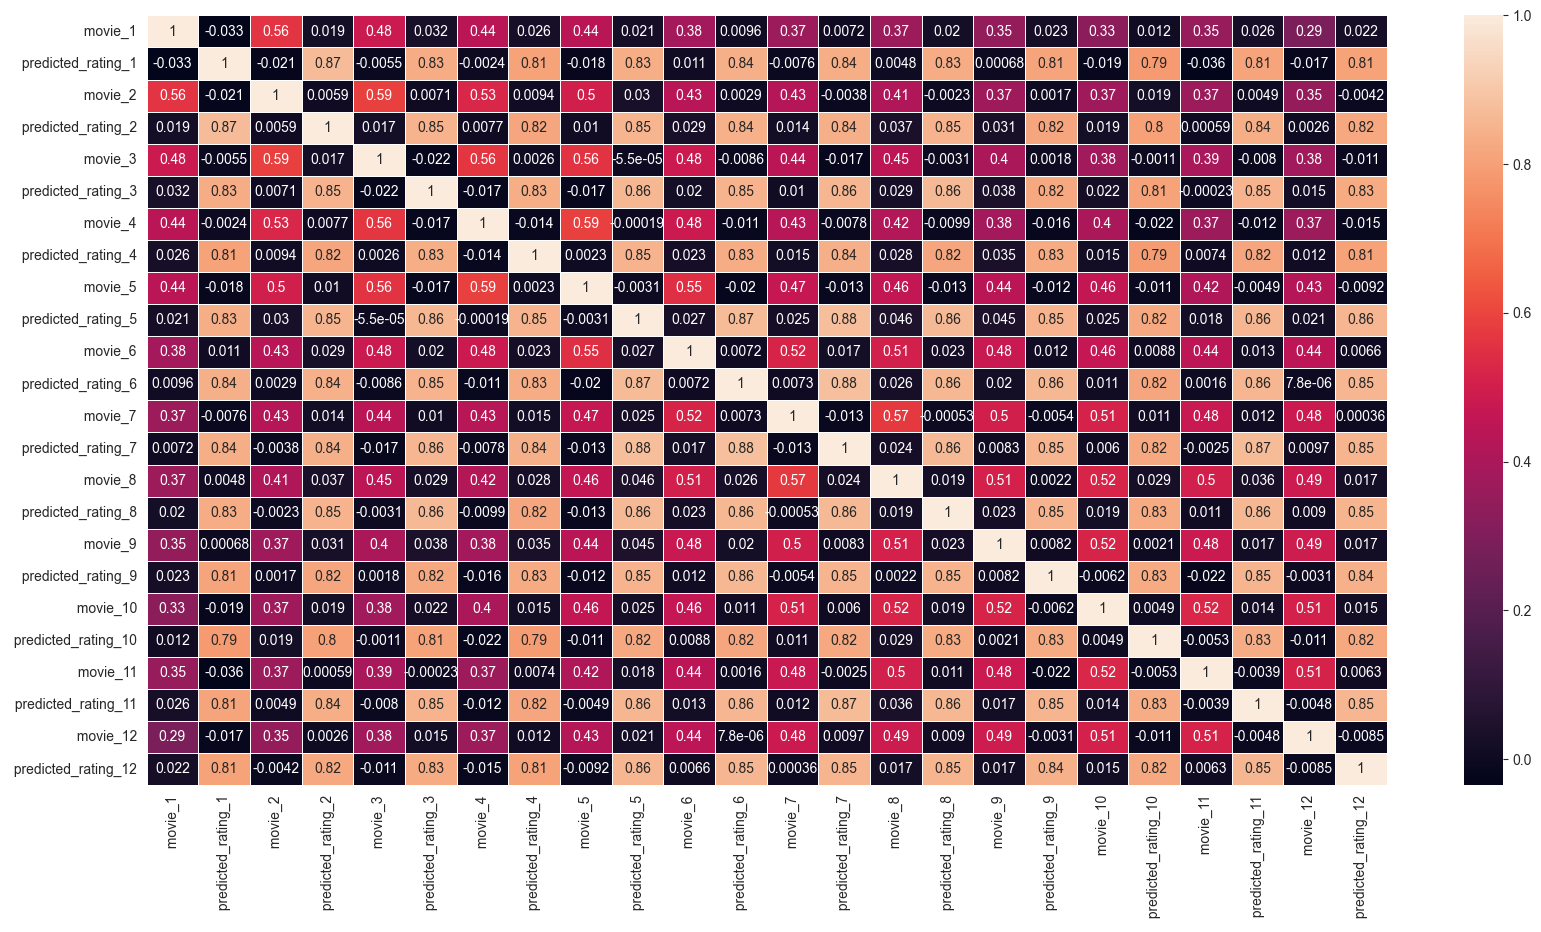

In [56]:
correlation = personality_data_df_selected.corr()
plt.figure(figsize=(20, 10))
ax = sns.heatmap(correlation, annot=True, linewidths=.5)

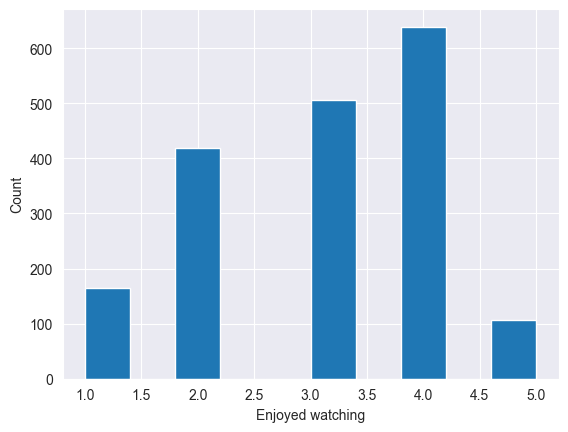

In [61]:
plt.figure()
plt.xlabel("w")
plt.ylabel("Count")
hist_is_personalized = plt.hist(personality_data_df['is_personalized'])
plt.show()

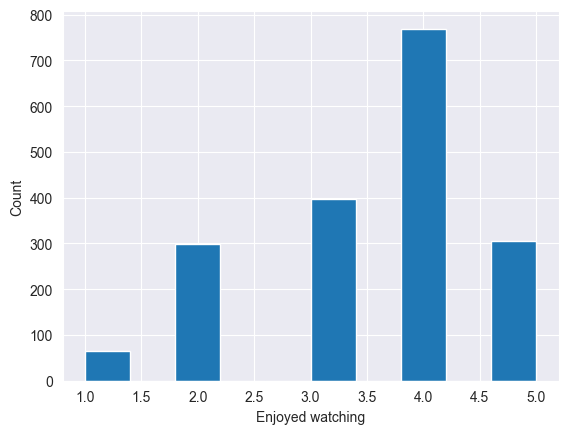

In [62]:
plt.figure()
plt.xlabel("Enjoyed watching")
plt.ylabel("Count")
hist_enjoy_watching = plt.hist(personality_data_df['enjoy_watching'])
plt.show()

### Kişiliğe Göre Tahmin
Bu bölüm, bir kişiliğin özelliklerinin, nihai sonucun ve derecesinin, bir kişinin bir filmden keyif alıp almayacağını tahmin etmek için kullanılıp kullanılamayacağını görmeye çalışacak. Tahmin etmek istediğimiz değişkenle en güçlü korelasyona sahip olduğu için "is_personalized" değişkeni de kullanılacaktır.

In [63]:
personality_data_df_predict_selected = personality_data_df.drop(
    ['userid',
     ' movie_1', ' predicted_rating_1',
     ' movie_2', ' predicted_rating_2',
     ' movie_3', ' predicted_rating_3',
     ' movie_4', ' predicted_rating_4',
     ' movie_5', ' predicted_rating_5',
     ' movie_6', ' predicted_rating_6',
     ' movie_7', ' predicted_rating_7',
     ' movie_8', ' predicted_rating_8',
     ' movie_9', ' predicted_rating_9',
     ' movie_10', ' predicted_rating_10',
     ' movie_11', ' predicted_rating_11',
     ' movie_12', ' predicted_rating_12',
     ], axis=1)

In [64]:
personality_data_df_predict_selected.head(10)

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,is_personalized,enjoy_watching
0,5.0,2.0,3.0,2.5,6.5,3,1,4,4
1,7.0,4.0,6.0,5.5,4.0,0,0,2,3
2,4.0,3.0,4.5,2.0,2.5,3,3,2,2
3,5.5,5.5,4.0,4.5,4.0,2,3,3,3
4,5.5,5.5,3.5,4.5,2.5,2,3,2,3
5,6.0,3.0,4.0,3.5,1.5,2,3,2,4
6,4.5,4.0,6.0,5.0,4.0,1,2,3,4
7,5.5,4.5,6.0,3.0,4.0,2,2,4,4
8,5.0,5.0,5.0,5.0,3.0,1,1,3,4
9,6.0,6.5,2.0,2.5,3.0,1,1,3,2


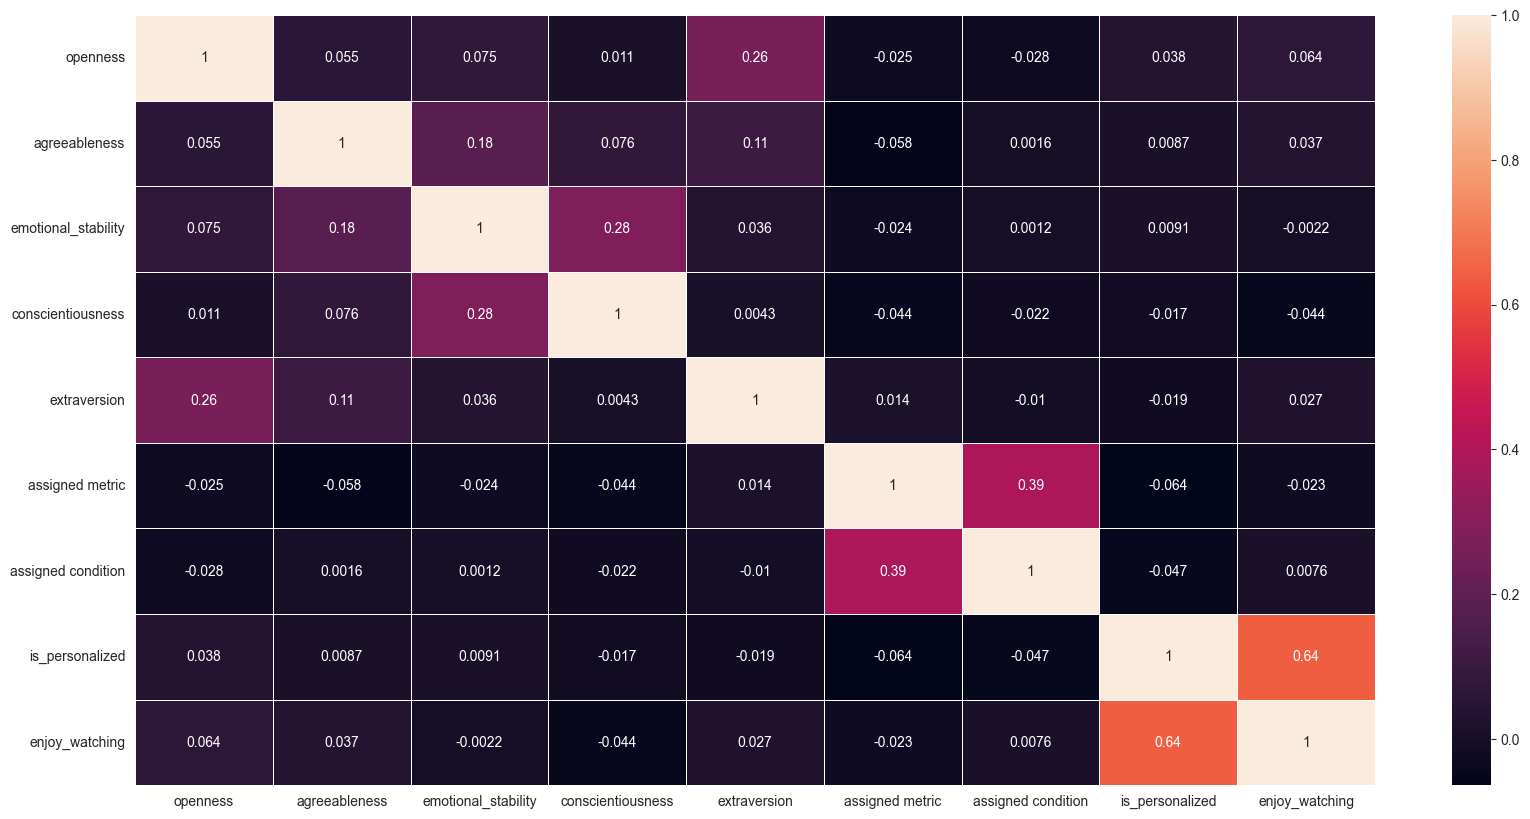

In [65]:
correlation = personality_data_df_predict_selected.corr()
plt.figure(figsize=(20, 10))
ax = sns.heatmap(correlation, annot=True, linewidths=.5)

In [66]:
y = personality_data_df_predict_selected['enjoy_watching']
x = personality_data_df_predict_selected.drop('enjoy_watching', axis=1)

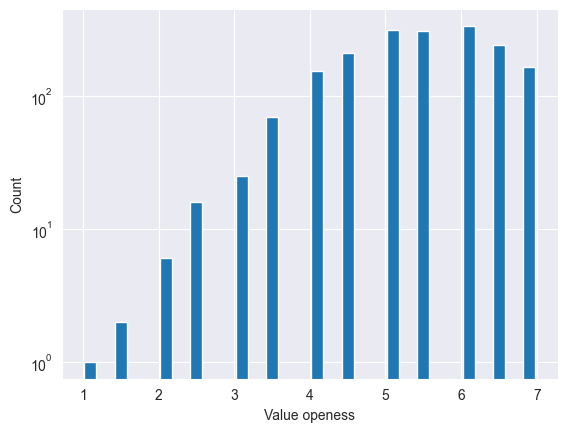

In [67]:
plt.figure()
plt.xlabel("Value openess")
plt.ylabel("Count")
hist = plt.hist(
    personality_data_df_predict_selected.openness,
    bins=30,
    range=[
        np.min(personality_data_df_predict_selected.openness),
        np.max(personality_data_df_predict_selected.openness)
    ],
    histtype="bar",
    rwidth=0.8,
    log=True
)

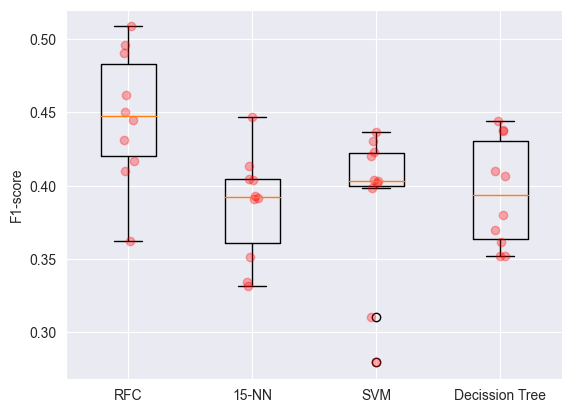

In [68]:
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn import metrics

#Division of data into train and test
PRC = 0.1
acc_r = np.zeros((10, 4))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=PRC)
    rfc = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
    knn = neighbors.KNeighborsClassifier(n_neighbors=15)
    svc = svm.SVC()
    dt = tree.DecisionTreeClassifier()

    rfc.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    dt.fit(X_train, y_train)

    yhat_rfc = rfc.predict(X_test)
    yhat_knn = knn.predict(X_test)
    yhat_svc = svc.predict(X_test)
    yhat_dt = dt.predict(X_test)

    acc_r[i][0] = metrics.f1_score(y_test, yhat_rfc, average='weighted')
    acc_r[i][1] = metrics.f1_score(y_test, yhat_knn, average='weighted')
    acc_r[i][2] = metrics.f1_score(y_test, yhat_svc, average='weighted')
    acc_r[i][3] = metrics.f1_score(y_test, yhat_dt, average='weighted')

plt.boxplot(acc_r);
for i in range(4):
    xderiv = (i + 1) * np.ones(acc_r[:, i].shape) + (np.random.rand(10, ) - 0.5) * 0.1
    plt.plot(xderiv, acc_r[:, i], 'ro', alpha=0.3)

ax = plt.gca()
ax.set_xticklabels(['RFC', '15-NN', 'SVM', 'Decission Tree'])
plt.ylabel('F1-score')
plt.savefig("error_ms_1.png", dpi=300, bbox_inches='tight')

In [69]:
from sklearn.model_selection import cross_val_score

#Division of data into train and test

scores = cross_val_score(knn, x, y, cv=5)  #Cross validation of KNN results
print('Cross-val Knn-15:', scores)
print('Cross-val Knn-15 mean:', scores.mean())

scores = cross_val_score(svc, x, y, cv=5)  #Cross validation of SVM results
print('Cross-val SVM:', scores)
print('Cross-val SVM mean:', scores.mean())

scores = cross_val_score(dt, x, y, cv=5)  #Cross validation of Decision Tree results
print('Cross-val Decision Tree:', scores)
print('Cross-val Decision Tree mean:', scores.mean())

scores = cross_val_score(rfc, x, y, cv=5)  #Cross validation of Random Forest results
print('Cross-val Random forest:', scores)
print('Cross-val Random forest mean:', scores.mean())

Cross-val Knn-15: [0.44414169 0.44141689 0.4359673  0.43324251 0.42622951]
Cross-val Knn-15 mean: 0.4361995801134587
Cross-val SVM: [0.44959128 0.50681199 0.47683924 0.50408719 0.44808743]
Cross-val SVM mean: 0.47708342639329376
Cross-val Decision Tree: [0.37874659 0.37057221 0.41416894 0.32697548 0.38797814]
Cross-val Decision Tree mean: 0.3756882714670716
Cross-val Random forest: [0.44141689 0.50408719 0.46321526 0.46594005 0.46721311]
Cross-val Random forest mean: 0.46837450305981154


# Kişilik Analizi

In [71]:
#0 = all, 1 = diversity, 2 = popularity, 3 = serendipity
dataset_pers0 = personality_data_df.loc[personality_data_df["assigned metric"] == 0]
dataset_pers1 = personality_data_df.loc[personality_data_df["assigned metric"] == 1]
dataset_pers2 = personality_data_df.loc[personality_data_df["assigned metric"] == 2]
dataset_pers3 = personality_data_df.loc[personality_data_df["assigned metric"] == 3]

print("All: ", dataset_pers0["is_personalized"].mean())
print("Diversity: ", dataset_pers1["is_personalized"].mean())
print("Popularity: ", dataset_pers2["is_personalized"].mean())
print("Serendipity: ", dataset_pers3["is_personalized"].mean())

All:  3.298076923076923
Diversity:  3.078846153846154
Popularity:  2.9721254355400695
Serendipity:  3.031954887218045


In [72]:
#0 = all, 1 = diversity, 2 = popularity, 3 = serendipity
print("All: ", dataset_pers0["enjoy_watching"].mean())
print("Diversity: ", dataset_pers1["enjoy_watching"].mean())
print("Popularity: ", dataset_pers2["enjoy_watching"].mean())
print("Serendipity: ", dataset_pers3["enjoy_watching"].mean())

All:  3.576923076923077
Diversity:  3.5576923076923075
Popularity:  3.4581881533101044
Serendipity:  3.5206766917293235


In [73]:
#assigned metric 0 = all, 1 = diversity, 2 = popularity, 3 = serendipity
#assigned condition 0 = default, 1 = high, 2 = medium, 3 = low
dataset_pers1High = dataset_pers1.loc[dataset_pers1["assigned condition"] == 1]
dataset_pers1Low = dataset_pers1.loc[dataset_pers1["assigned condition"] == 3]
dataset_pers2High = dataset_pers2.loc[dataset_pers2["assigned condition"] == 1]
dataset_pers2Low = dataset_pers2.loc[dataset_pers2["assigned condition"] == 3]
dataset_pers3High = dataset_pers3.loc[dataset_pers3["assigned condition"] == 1]
dataset_pers3Low = dataset_pers3.loc[dataset_pers3["assigned condition"] == 3]

print(dataset_pers1High.shape)
print(dataset_pers1Low.shape)
print(dataset_pers2High.shape)
print(dataset_pers2Low.shape)
print(dataset_pers3High.shape)
print(dataset_pers3Low.shape)

(176, 34)
(174, 34)
(178, 34)
(192, 34)
(200, 34)
(172, 34)


In [74]:
print("Is personalized:")
print("Diversity high: ", dataset_pers1High["is_personalized"].mean())
print("Diversity low: ", dataset_pers1Low["is_personalized"].mean())
print("Popularity high: ", dataset_pers2High["is_personalized"].mean())
print("Popularity low: ", dataset_pers2Low["is_personalized"].mean())
print("Serendipity high: ", dataset_pers3High["is_personalized"].mean())
print("Serendipity low: ", dataset_pers3Low["is_personalized"].mean())

print("Enjoyed watching:")
print("Diversity high: ", dataset_pers1High["enjoy_watching"].mean())
print("Diversity low: ", dataset_pers1Low["enjoy_watching"].mean())
print("Popularity high: ", dataset_pers2High["enjoy_watching"].mean())
print("Popularity low: ", dataset_pers2Low["enjoy_watching"].mean())
print("Serendipity high: ", dataset_pers3High["enjoy_watching"].mean())
print("Serendipity low: ", dataset_pers3Low["enjoy_watching"].mean())

Is personalized:
Diversity high:  2.965909090909091
Diversity low:  3.17816091954023
Popularity high:  3.0280898876404496
Popularity low:  3.03125
Serendipity high:  3.03
Serendipity low:  2.854651162790698
Enjoyed watching:
Diversity high:  3.4431818181818183
Diversity low:  3.689655172413793
Popularity high:  3.6123595505617976
Popularity low:  3.5208333333333335
Serendipity high:  3.4
Serendipity low:  3.453488372093023


(array([ 6.,  0., 29.,  0.,  0., 47.,  0., 69.,  0., 25.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

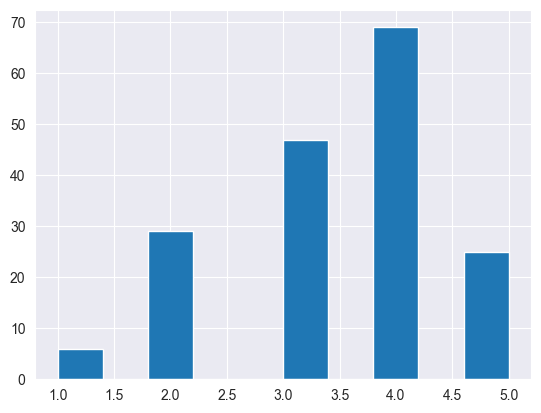

In [75]:
plt.hist(dataset_pers1High['enjoy_watching'])

(array([ 3.,  0., 22.,  0.,  0., 31.,  0., 88.,  0., 30.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

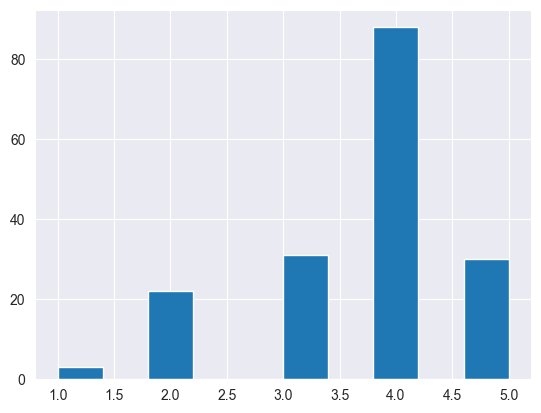

In [76]:
plt.hist(dataset_pers1Low['enjoy_watching'])

In [78]:
movies_df.head(10)

,id,title,type
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [108]:
def merge_movies_dataframe(assigned_metric: int):
    list_personality: list = []

    for i in range(len(personality_data_df[' movie_1'])):
        if personality_data_df['assigned metric'][i] == assigned_metric:
            for j in range(len(movies_df['id'])):
                movie_info = f"{movies_df['title'][j]} - {movies_df['type'][j]}"

                if personality_data_df[' movie_1'][i] == movies_df['id'][j]:
                    list_personality.append(movie_info)
                    break
                if personality_data_df[' movie_2'][i] == movies_df['id'][j]:
                    list_personality.append(movie_info)
                    break
                if personality_data_df[' movie_3'][i] == movies_df['id'][j]:
                    list_personality.append(movie_info)
                    break

    return list_personality

In [109]:
list_personality_metric_1 = merge_movies_dataframe(1)

pel, count = np.unique(list_personality_metric_1, return_counts=True)
count_sort_ind = np.argsort(-count)
pel[count_sort_ind]

array(['Shawshank Redemption, The (1994) - Drama',
       'Godfather, The (1972) - Crime|Drama',
       'Wallace & Gromit: A Close Shave (1995) - Animation|Children|Comedy',
       'Lord of the Rings: The Fellowship of the Ring, The (2001) - Action|Adventure|Fantasy',
       'Usual Suspects, The (1995) - Crime|Mystery|Thriller',
       'Seven Samurai (Shichinin no samurai) (1954) - Action|Drama',
       'Star Wars: Episode V - The Empire Strikes Back (1980) - Action|Adventure|Sci-Fi',
       'Star Wars: Episode IV - A New Hope (a.k.a. Star Wars) (1977) - Action|Adventure|Sci-Fi',
       "Schindler's List (1993) - Drama|War",
       'Pianist, The (2002) - Drama|War',
       'Life Is Beautiful (La Vita è bella) (1997) - Comedy|Drama|Romance|War',
       'Stalker (1979) - Drama|Mystery|Sci-Fi',
       'Fight Club (1999) - Action|Crime|Drama|Thriller',
       'Spirited Away (Sen to Chihiro no kamikakushi) (2001) - Adventure|Animation|Children|Fantasy',
       'Monty Python and the Holy Gra

In [110]:
print(count[count_sort_ind][:6])

[22 19 18 15 14 12]


In [111]:
list_personality_metric_2 = merge_movies_dataframe(2)

pel, count = np.unique(list_personality_metric_2, return_counts=True)
count_sort_ind = np.argsort(-count)
pel[count_sort_ind]

array(['Wallace & Gromit: The Wrong Trousers (1993) - Animation|Children|Comedy|Crime',
       'Yojimbo (1961) - Action|Comedy|Crime|Drama|Thriller',
       'Fog of War: Eleven Lessons from the Life of Robert S. McNamara, The (2003) - Documentary',
       'Seven Samurai (Shichinin no samurai) (1954) - Action|Drama',
       'Blade Runner (1982) - Adventure|Drama|Film-Noir|Sci-Fi|Thriller',
       'Modern Times (1936) - Comedy|Romance',
       'Monty Python and the Holy Grail (1975) - Comedy',
       'My Neighbor Totoro (Tonari no Totoro) (1988) - Animation|Children|Fantasy',
       'Rear Window (1954) - Mystery|Thriller',
       'Casablanca (1942) - Drama|Romance',
       'Taxi Driver (1976) - Crime|Drama|Thriller',
       'Léon: The Professional (Léon) (Professional, The) (1994) - Crime|Drama|Romance|Thriller',
       'Vertigo (1958) - Drama|Mystery|Romance|Thriller',
       'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) - Comedy|War',
       'North by Nor

In [112]:
print(count[count_sort_ind][:6])

[7 7 6 6 6 6]


In [116]:
list_personality_metric_3 = merge_movies_dataframe(3)

pel, count = np.unique(list_personality_metric_3, return_counts=True)
count_sort_ind = np.argsort(-count)
pel[count_sort_ind]

array(['To Kill a Mockingbird (1962) - Drama',
       'Godfather, The (1972) - Crime|Drama',
       'Pulp Fiction (1994) - Comedy|Crime|Drama',
       'Rear Window (1954) - Mystery|Thriller',
       'Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966) - Action|Adventure|Western',
       'Sting, The (1973) - Comedy|Crime',
       'Sanjuro (Tsubaki Sanjûrô) (1962) - Action|Adventure|Drama',
       "Once Upon a Time in the West (C'era una volta il West) (1968) - Action|Drama|Western",
       'Taxi Driver (1976) - Crime|Drama|Thriller',
       'Lawrence of Arabia (1962) - Adventure|Drama|War',
       'Serenity (2005) - Action|Adventure|Sci-Fi|Western',
       "Schindler's List (1993) - Drama|War",
       'Cinema Paradiso (Nuovo cinema Paradiso) (1989) - Comedy|Drama|Romance',
       'Casablanca (1942) - Drama|Romance',
       'Tokyo Story (Tôkyô monogatari) (1953) - Drama',
       'Seven Samurai (Shichinin no samurai) (1954) - Action|Drama',
       'Braveheart (1995) 

In [ ]:
print(count[count_sort_ind][:6])